<a href="https://colab.research.google.com/github/achu-2006-dot/wine_quality_prediction/blob/main/Copy_of_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACCESSING THE DATASET FROM GOOGLE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TASK 1:LOAD AND UNDERSTAND OF DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('/content/drive/MyDrive/colab wine/winequality.csv')


In [4]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.sample(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
570,11.5,0.35,0.49,3.3,0.070,10.0,37.0,1.0003,3.32,0.91,11.0,6
158,7.1,0.68,0.00,2.2,0.073,12.0,22.0,0.9969,3.48,0.50,9.3,5
580,12.3,0.50,0.49,2.2,0.089,5.0,14.0,1.0002,3.19,0.44,9.6,5
486,10.2,0.67,0.39,1.9,0.054,6.0,17.0,0.9976,3.17,0.47,10.0,5
563,7.6,0.29,0.49,2.7,0.092,25.0,60.0,0.9971,3.31,0.61,10.1,6


what type of data is present?
The dataset contains structured,numerical chemical properties of wine

what does each row represent?
Each row represents one wine sample

TASK 2:BASIC DATA INSPECTION

Column names in the dataset

In [7]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

how many rows and columns are there?

In [8]:
df.shape


(1599, 12)

data type of each column

In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


summary statistics

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Data inspection helps to detect incorrect data types,Missing values,Scaledifferences,Outliers
This prevents errors before training ML models

TASK 3:MISSING VALUES ANALYSIS

In [11]:
df.isnull()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


No missing values (dataset is clean)   

If present in real-world projects then
Drop rows,
Fill with mean/median,
Use advanced imputation.

TASK 4-EXPLORATORY DATA ANALYSIS(EDA)

In [13]:
df['quality'].value_counts()


,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


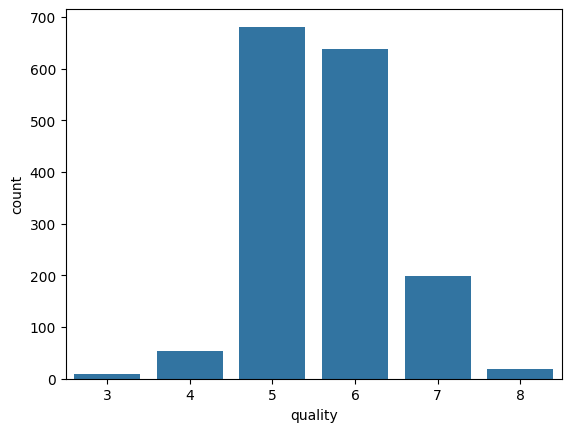

In [14]:
plt.figure()
sns.countplot(x='quality', data=df)
plt.show()


this graph tells that most of the wines have average quality,
Very few high or very low quality wines
and Dataset is imbalanced

EDA helps to Understand the patterns,
Detect imbalance,
Decide modeling strategy before model training

TASK 5-CONVERT THE PROBLEM INTO CLASSIFICATION TASK

In [15]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)


In [16]:
df[['quality', 'quality_label']].sample(10)


,quality,quality_label
769,5,0
258,5,0
841,5,0
574,6,0
455,8,1
895,6,0
1223,6,0
352,5,0
412,5,0
947,7,1


Binary classification is easier to deploy Useful for decision systems (Good / Bad)

TASK-6-FEATURES AND TARGET SEPARATION

In [17]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Using quality as input causes data leakage.
Model would cheat and give unrealistic accuracy

TASK 7-TRAIN-TEST SPLIT

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


we split data into taining and testing sets which prevents overfitting
and tests model on unseen data

Training & testing on same data gives false accuracy

TASK 8-FEATURE SCALING

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature scaling ensures all features are on the same scale so no feature dominates due to large values.
It improves model accuracy and helps algorithms learn efficiently.

Distance-based models (KNN, SVM) need scaling because they rely on distance calculations.
Gradient-based models (Logistic Regression) need scaling for faster and stable convergence.

Distance-based algorithms measure similarity using distance formulas.
Feature scaling ensures all features contribute equally to distance computation.

TASK 9-MODEL TRAINING

Logistic Regression- Logistic Regression is a gradient-based algorithm used for binary classification.
Feature scaling is required to ensure faster and stable convergence during gradient descent.

In [20]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)


KNN - KNN is a distance-based algorithm that classifies data based on nearest neighbors.
Feature scaling is necessary because distance calculations are affected by feature magnitude.

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)


DECISION TREE - Decision Tree splits data using rule-based conditions on feature values.
Feature scaling is not required because splits are not based on distances.

In [22]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


RANDOM FOREST - Random Forest is an ensemble of multiple decision trees that improves accuracy and reduces overfitting.
Feature scaling is not required since it relies on tree-based splitting.

In [23]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


SVM - SVM finds an optimal hyperplane by maximizing the margin between classes.
Feature scaling is important because margin calculation depends on distance.

In [24]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)


TASK 10-MODEL EVALUATION AND COMPARISON

In [25]:
results = {
    'Logistic Regression': accuracy_score(y_test, lr_pred),
    'KNN': accuracy_score(y_test, knn_pred),
    'Decision Tree': accuracy_score(y_test, dt_pred),
    'Random Forest': accuracy_score(y_test, rf_pred),
    'SVM': accuracy_score(y_test, svm_pred)
}

results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
results_df


,Model,Accuracy
0,Logistic Regression,0.865625
1,KNN,0.881250
2,Decision Tree,0.871875
3,Random Forest,0.900000
4,SVM,0.875000


 Random Forest or SVM is best model because it handles non-linear patterns better

 TASK 11: Pipeline & Hyperparameter Tuning

In [26]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [27]:
grid.best_params_
grid_results = pd.DataFrame(grid.cv_results_)

grid_results_table = grid_results[
    ['param_svm__C',
     'param_svm__kernel',
     'mean_test_score',
     'rank_test_score']
]

grid_results_table.sort_values(by='rank_test_score')



,param_svm__C,param_svm__kernel,mean_test_score,rank_test_score
5,10.0,rbf,0.894442,1
3,1.0,rbf,0.888195,2
1,0.1,rbf,0.867083,3
0,0.1,linear,0.867083,3
2,1.0,linear,0.865521,5
4,10.0,linear,0.864740,6


In [28]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.89375

Pipelines are used to prevent data leakage

GridSearch finds best parameters automatically

TASK 12:FINAL CONCLUSION

In this project, the wine quality dataset was analyzed to understand the relationship between chemical properties and wine quality. Exploratory Data Analysis helped to identify data distribution, class imbalance, and important patterns. The task was converted into a binary classification problem, and multiple machine learning models were trained and evaluated. Among them, Random Forest and SVM showed the best performance. This project helped me understand the complete machine learning workflow, including data preprocessing, model selection, evaluation, and optimization, which is essential for real-world applications.